In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset = pd.read_csv("iris.csv")
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal length   150 non-null    float64
 1   sepal width    150 non-null    float64
 2    petal length  150 non-null    float64
 3    petal width   150 non-null    float64
 4   class          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [6]:
# all columns apart from last (predictor attrs)
X = dataset.iloc[:, :-1].values
# only last column (target attr)
y = dataset.iloc[:, -1].values

In [7]:
# encode categorical data to classes
from sklearn.preprocessing import LabelEncoder
Labelencoder_y = LabelEncoder()
y = Labelencoder_y.fit_transform(y)

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# split dataset into testing & training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y, test_size=0.25, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
x_test  = sc.fit_transform(X_test)

In [ ]:
# building the KNN classifier model
# minkowski: distance formula and p=2 ^2 of distance formula
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn.fit(X_train, y_train)

In [26]:
y_pred = knn.predict(X_test)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  0, 13],
       [ 0,  0, 16],
       [ 0,  0,  9]])

In [14]:
ac = accuracy_score(y_test, y_pred)
ac*100

23.684210526315788

In [36]:
scores = []

for k in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

scores

[0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788,
 0.23684210526315788]

Text(0, 0.5, 'Accuracy')

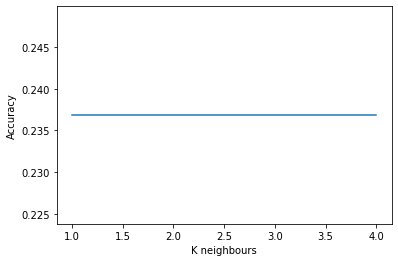

In [34]:
plt.plot(range(1, 5), scores)
plt.xlabel("K neighbours")
plt.ylabel("Accuracy")

In [17]:
# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train, cv=10)
scores

array([1.        , 0.91666667, 0.81818182, 0.90909091, 1.        ,
       1.        , 1.        , 0.81818182, 1.        , 1.        ])